In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Parametre du modele Logistique

In [267]:

r = 1.0
K = 1.0

# Definition du modele Logistique

In [268]:
def logistic_1d(x, r=r, K=K):

    dx = r * x * (1 - x / K)
    return dx

# Les Schemas numerique : 

# 1 - Schema Euler Explicite

In [269]:
def euler_explicit_1d(f, x0, dt, T):
    
    N = int(T / dt)
    traj = np.zeros(N+1)
    traj[0] = x0

    for n in range(N):
        traj[n+1] = traj[n] + dt * f(traj[n])

    return traj

In [270]:
x0 = 0.2       
T = 50         

# test avec un pas stable

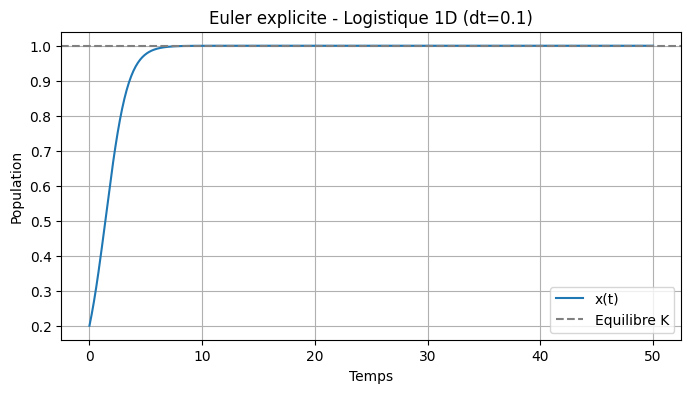

In [271]:

dt = 0.1
traj = euler_explicit_1d(logistic_1d, x0, dt, T)
t = np.linspace(0, T, len(traj))

plt.figure(figsize=(8,4))
plt.plot(t, traj, label="x(t)")
plt.axhline(K, linestyle="--", color="gray", label="Equilibre K")
plt.xlabel("Temps")
plt.ylabel("Population")
plt.title("Euler explicite - Logistique 1D (dt=0.1)")
plt.grid(True)
plt.legend()
plt.show()

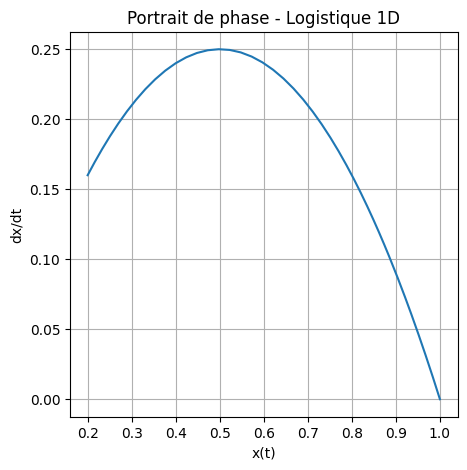

In [272]:
dx = logistic_1d(traj) 
plt.figure(figsize=(5,5))
plt.plot(traj, dx)
plt.xlabel("x(t)")
plt.ylabel("dx/dt")
plt.title("Portrait de phase - Logistique 1D")
plt.grid(True)
plt.show()


# influence du pas de temps

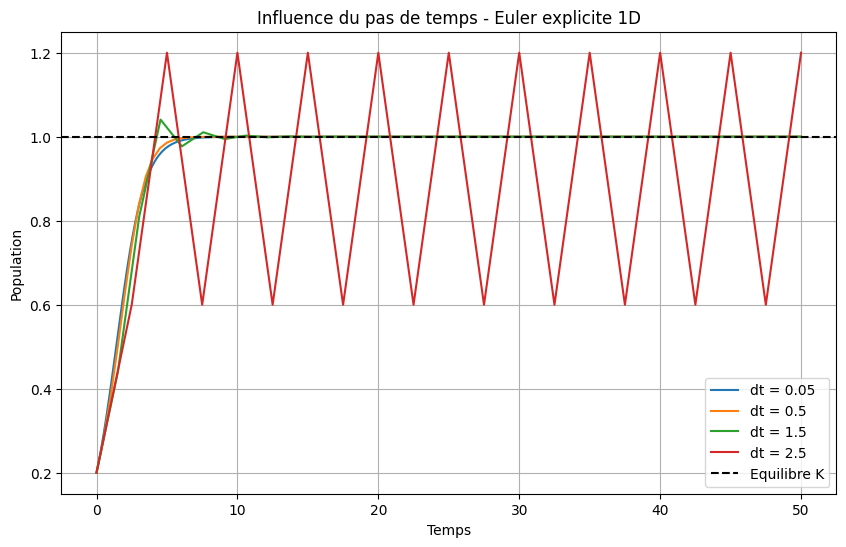

In [273]:
dt_values = [0.05, 0.5, 1.5, 2.5]

plt.figure(figsize=(10,6))

for dt in dt_values:
    traj = euler_explicit_1d(logistic_1d, x0, dt, T)
    plt.plot(np.linspace(0, T, len(traj)), traj, label=f"dt = {dt}")

plt.axhline(K, linestyle="--", color="black", label="Equilibre K")
plt.xlabel("Temps")
plt.ylabel("Population")
plt.title("Influence du pas de temps - Euler explicite 1D")
plt.grid(True)
plt.legend()
plt.show()

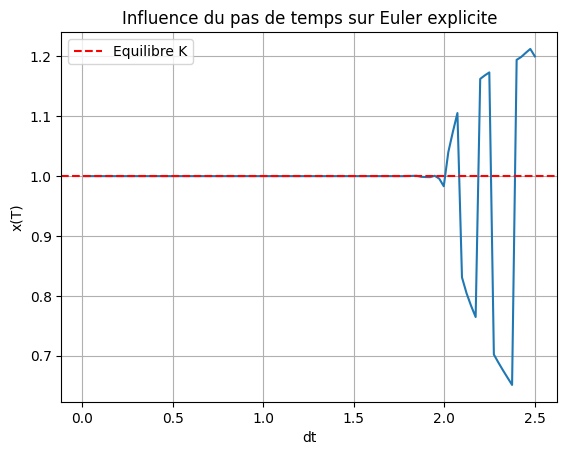

In [274]:
dt_scan = np.linspace(0.01, 2.5, 100)
x_final = []

for dt in dt_scan:
    traj = euler_explicit_1d(logistic_1d, x0, dt, T)
    x_final.append(traj[-1])

plt.plot(dt_scan, x_final)
plt.axhline(K, linestyle='--', color='red', label='Equilibre K')
plt.xlabel("dt")
plt.ylabel("x(T)")
plt.title("Influence du pas de temps sur Euler explicite")
plt.grid(True)
plt.legend()
plt.show()


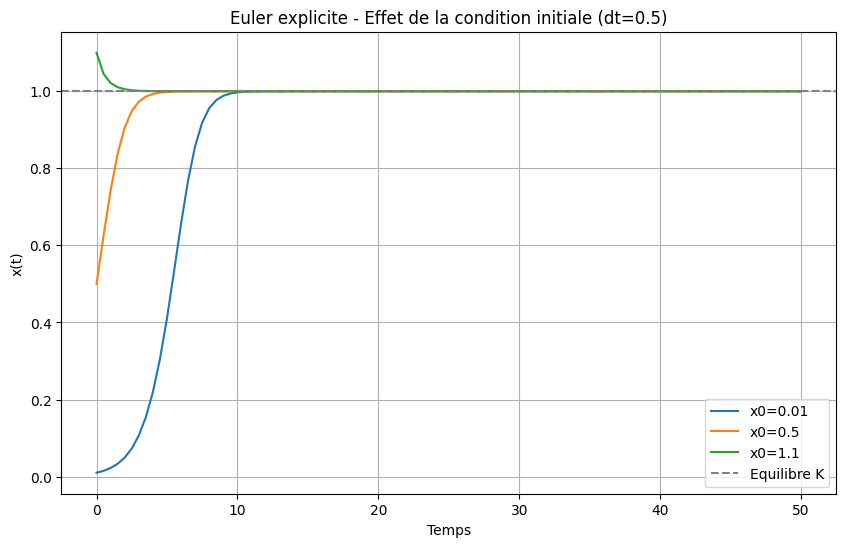

In [275]:
x0_values = [0.01, 0.5, 1.1]
dt = 0.5

plt.figure(figsize=(10,6))
for x0_test in x0_values:
    traj = euler_explicit_1d(logistic_1d, x0_test, dt, T)
    t_vals = np.linspace(0, T, len(traj))
    plt.plot(t_vals, traj, label=f"x0={x0_test}")

plt.axhline(K, linestyle='--', color='gray', label='Equilibre K')
plt.xlabel("Temps")
plt.ylabel("x(t)")
plt.title(f"Euler explicite - Effet de la condition initiale (dt={dt})")
plt.grid(True)
plt.legend()
plt.show()

# 2- Schema Runge-Kutta 4th order (RK4)

# definition schema RK4

In [276]:
def rk4_1d(f, x0, dt, T):
    
    N = int(T / dt)
    traj = np.zeros(N+1)
    traj[0] = x0
    
    for n in range(N):
        k1 = f(traj[n])
        k2 = f(traj[n] + dt/2 * k1)
        k3 = f(traj[n] + dt/2 * k2)
        k4 = f(traj[n] + dt * k3)
        
        traj[n+1] = traj[n] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
        
    return traj


# parametre de simulation

In [277]:
x0 = 0.2
T = 20

# test avec pas stable

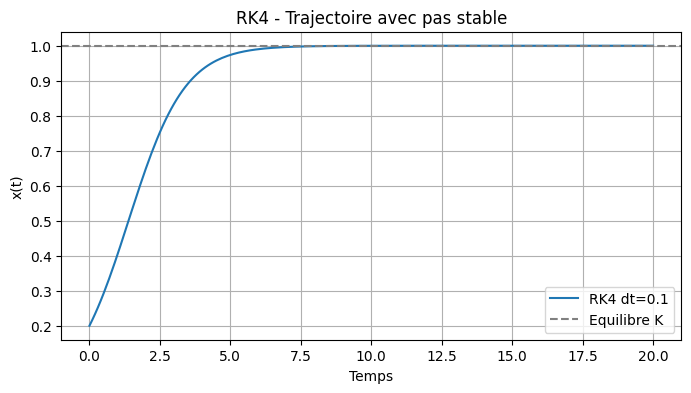

In [278]:
dt = 0.1
traj = rk4_1d(logistic_1d, x0, dt, T)
t_vals = np.linspace(0, T, len(traj))

plt.figure(figsize=(8,4))
plt.plot(t_vals, traj, label=f"RK4 dt={dt}")
plt.axhline(K, linestyle='--', color='gray', label='Equilibre K')
plt.xlabel("Temps")
plt.ylabel("x(t)")
plt.title("RK4 - Trajectoire avec pas stable")
plt.grid(True)
plt.legend()
plt.show()

# Portrait de phase 1D (x vs dx/dt)

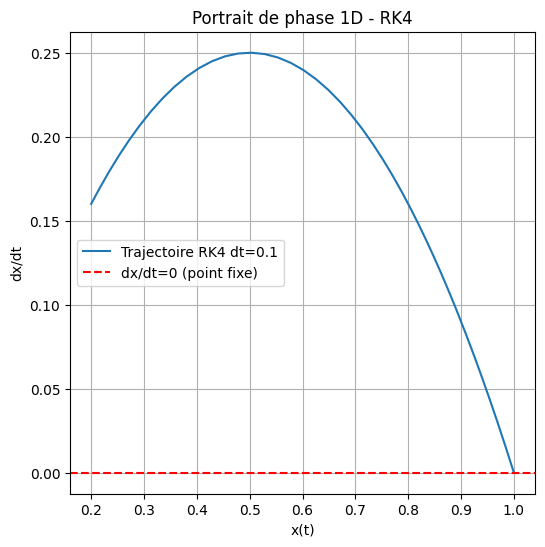

In [279]:
plt.figure(figsize=(6,6))
traj = rk4_1d(logistic_1d, x0, 0.1, T)
dx = logistic_1d(traj)
plt.plot(traj, dx, label="Trajectoire RK4 dt=0.1")
plt.axhline(0, color='red', linestyle='--', label="dx/dt=0 (point fixe)")
plt.xlabel("x(t)")
plt.ylabel("dx/dt")
plt.title("Portrait de phase 1D - RK4")
plt.grid(True)
plt.legend()
plt.show()


# Influence du pas de temps

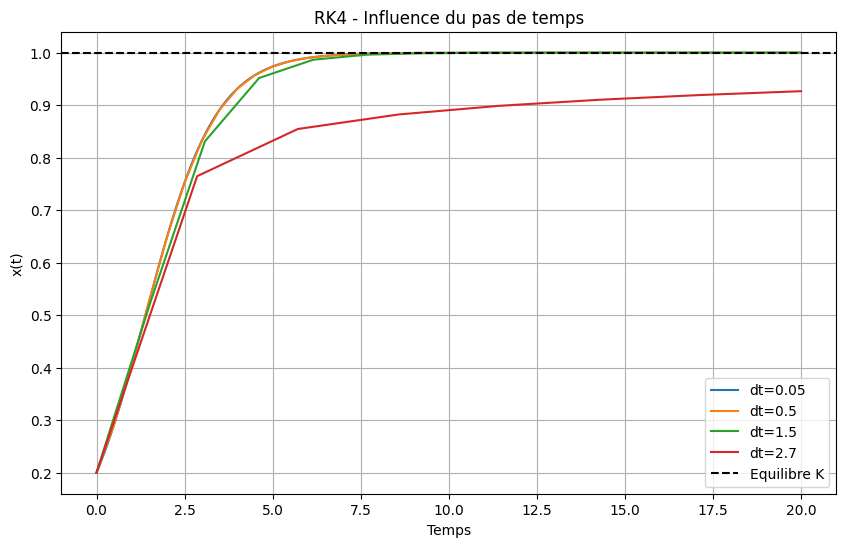

In [280]:
dt_values = [0.05, 0.5, 1.5, 2.7]
plt.figure(figsize=(10,6))
for dt in dt_values:
    traj = rk4_1d(logistic_1d, x0, dt, T)
    t_vals = np.linspace(0, T, len(traj))
    plt.plot(t_vals, traj, label=f"dt={dt}")

plt.axhline(K, linestyle='--', color='black', label="Equilibre K")
plt.xlabel("Temps")
plt.ylabel("x(t)")
plt.title("RK4 - Influence du pas de temps")
plt.grid(True)
plt.legend()
plt.show()

# euler implicite

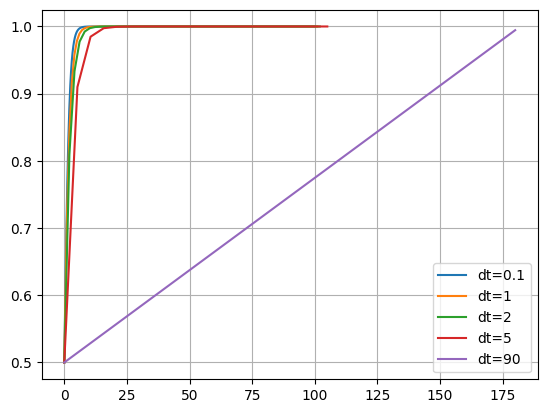

In [281]:
def euler_implicite_newton(x0, dt, T, tol=1e-12, max_iter=50):
    n_steps = int(T/dt)
    x = np.zeros(n_steps+1)
    x[0] = x0
    
    for n in range(n_steps):
        xn = x[n]
        x_next = xn  # initial guess
        for _ in range(max_iter):
            g = x_next - xn - dt*x_next*(1 - x_next)
            dg = 1 - dt*(1 - 2*x_next)
            x_new = x_next - g/dg
            if abs(x_new - x_next) < tol:
                break
            x_next = x_new
        x[n+1] = x_next
    return x

# Test rapide
x0 = 0.5
T = 100
for dt in [0.1, 1, 2, 5, 90]:
    x = euler_implicite_newton(x0, dt, T)
    t = np.linspace(0, len(x)*dt, len(x))
    plt.plot(t, x, label=f"dt={dt}")

plt.legend()
plt.grid()
plt.show()

# Van der Pol

# Euler Explicite 

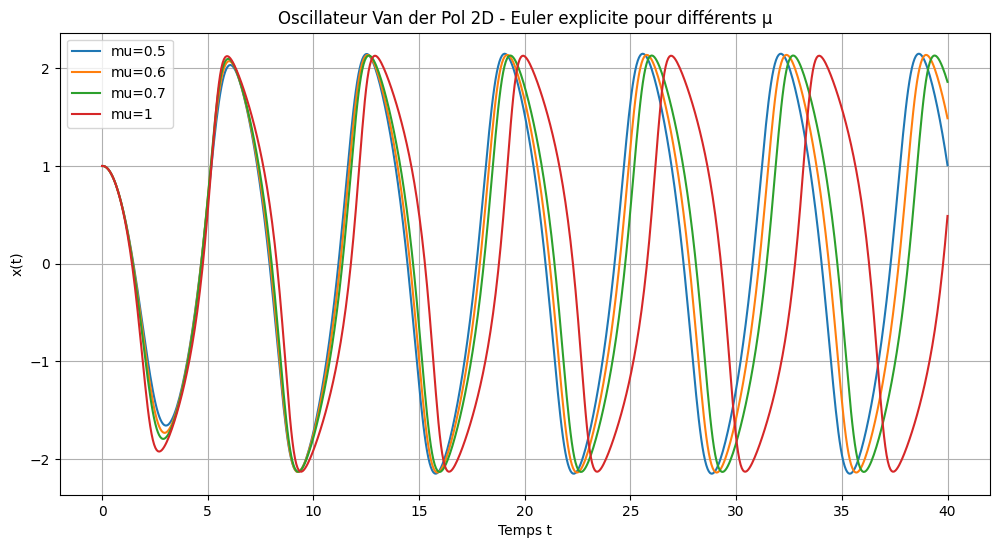

In [282]:
import numpy as np
import matplotlib.pyplot as plt

# définition du modèle Van der Pol
def van_der_pol(X, mu=1.0):
    x, y = X
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return np.array([dxdt, dydt])

# schéma Euler explicite
def euler_explicite_vdp(X0, dt, T, mu=1.0):
    n_steps = int(T/dt)
    X = np.zeros((n_steps+1, 2))
    X[0] = X0
    for n in range(n_steps):
        X[n+1] = X[n] + dt * van_der_pol(X[n], mu)
    return X

# paramètres
X0 = [1.0, 0.0]  # condition initiale
T = 40           # temps final
dt = 0.06   # pas de temps fixe pour cette boucle
mus = [0.5, 0.6, 0.7, 1]  # différentes valeurs de mu à tester

plt.figure(figsize=(12,6))

for mu in mus:
    X = euler_explicite_vdp(X0, dt, T, mu)
    t = np.linspace(0, T, len(X))
    plt.plot(t, X[:,0], label=f"mu={mu}")

plt.xlabel('Temps t')
plt.ylabel('x(t)')
plt.title('Oscillateur Van der Pol 2D - Euler explicite pour différents μ')
plt.grid(True)
plt.legend()
plt.show()


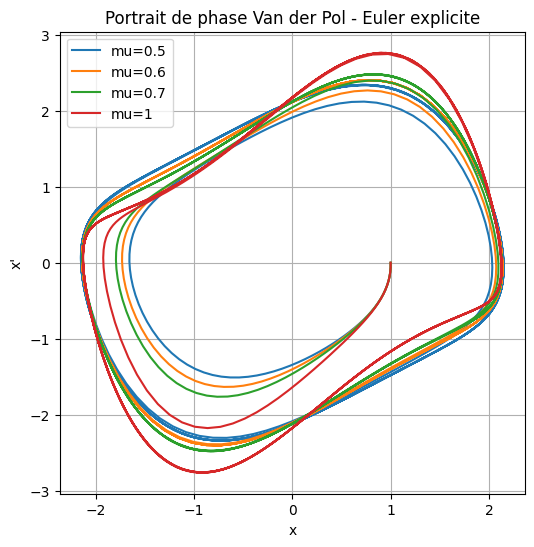

In [283]:
plt.figure(figsize=(6,6))

for mu in mus:
    X = euler_explicite_vdp(X0, dt, T, mu)
    plt.plot(X[:,0], X[:,1], label=f'mu={mu}')

plt.xlabel('x')
plt.ylabel("x'")
plt.title('Portrait de phase Van der Pol - Euler explicite')
plt.grid(True)
plt.legend()
plt.show()

# Runge-Kutta 4

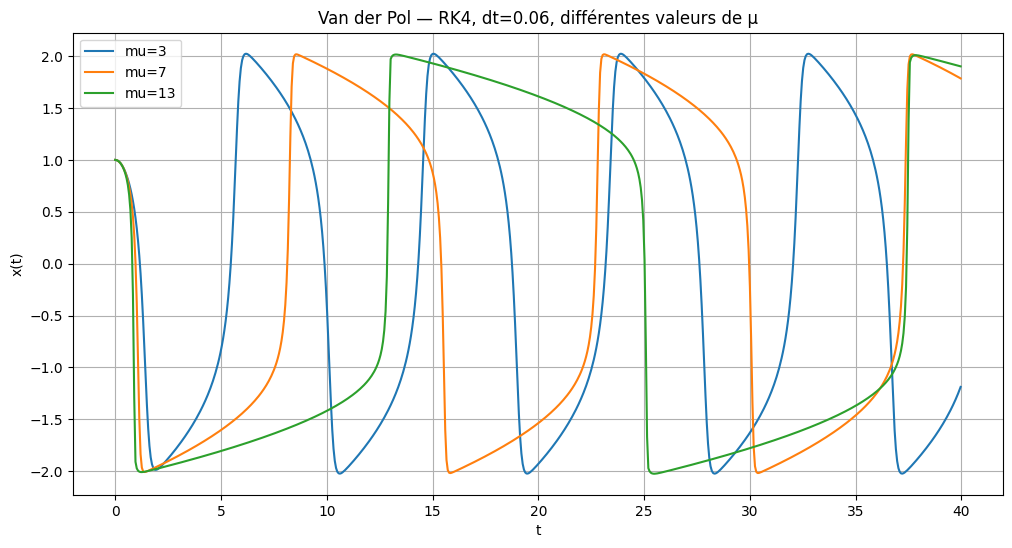

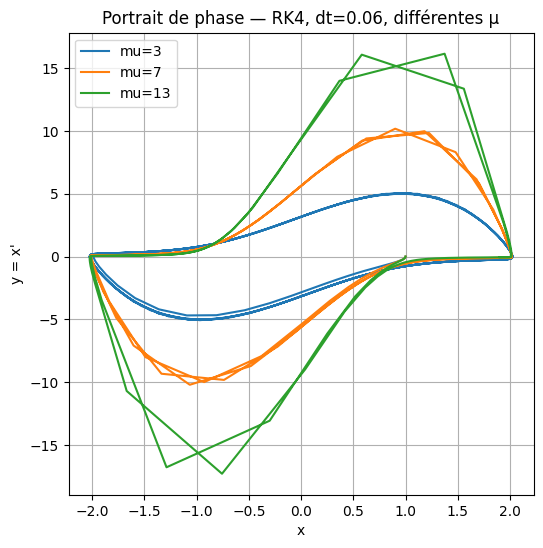

In [284]:
import numpy as np
import matplotlib.pyplot as plt

# modèle Van der Pol
def van_der_pol(X, mu=1.0):
    x, y = X
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return np.array([dxdt, dydt])

# schéma RK4
def rk4_vdp(x0, dt, T, mu=1.0):
    n_steps = int(T/dt)
    t = np.linspace(0, n_steps*dt, n_steps+1)
    X = np.zeros((n_steps+1, 2))
    X[0] = x0
    for n in range(n_steps):
        k1 = van_der_pol(X[n], mu)
        k2 = van_der_pol(X[n] + 0.5*dt*k1, mu)
        k3 = van_der_pol(X[n] + 0.5*dt*k2, mu)
        k4 = van_der_pol(X[n] + dt*k3, mu)
        X[n+1] = X[n] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, X

# paramètres
x0 = np.array([1.0, 0.0])
T = 40
dt = 0.06           # pas de temps fixe
mus = [3, 7, 13]        # différentes valeurs de mu à tester

# --- x(t) vs t ---
plt.figure(figsize=(12,6))
for mu in mus:
    t, X = rk4_vdp(x0, dt, T, mu)
    plt.plot(t, X[:,0], label=f"mu={mu}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(f"Van der Pol — RK4, dt={dt}, différentes valeurs de μ")
plt.grid(True)
plt.legend()
plt.show()

# --- Portrait de phase x vs y ---
plt.figure(figsize=(6,6))
for mu in mus:
    t, X = rk4_vdp(x0, dt, T, mu)
    plt.plot(X[:,0], X[:,1], label=f"mu={mu}")
plt.xlabel("x")
plt.ylabel("y = x'")
plt.title(f"Portrait de phase — RK4, dt={dt}, différentes μ")
plt.grid(True)
plt.legend()
plt.show()


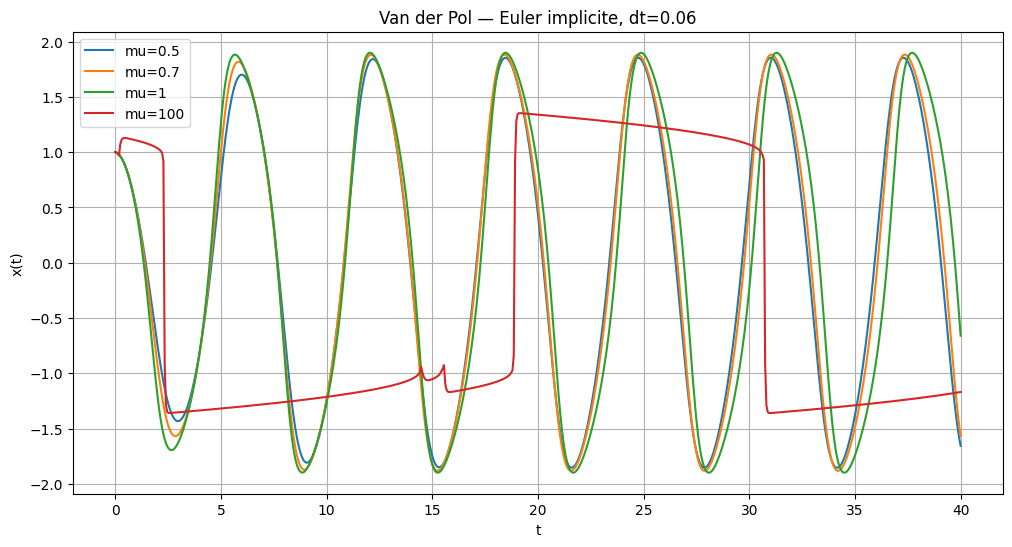

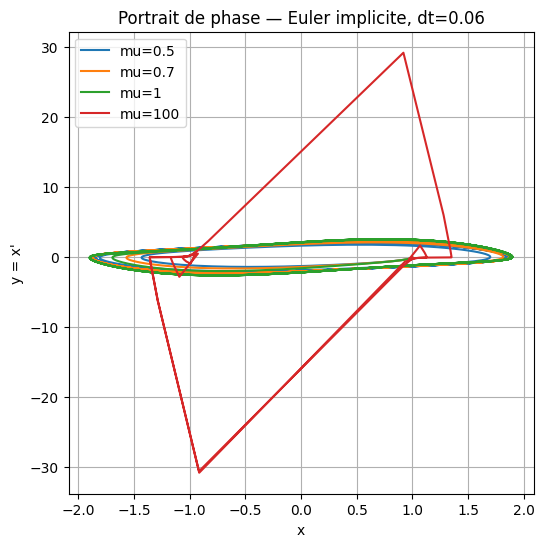

In [285]:
import numpy as np
import matplotlib.pyplot as plt

# Van der Pol
def van_der_pol(X, mu=1.0):
    x, y = X
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return np.array([dxdt, dydt])

# Jacobien de F(X) pour Newton-Raphson
def jacobian_vdp(X, mu=1.0):
    x, y = X
    J = np.array([[0, 1],
                  [-1 - 2*mu*x*y, mu*(1 - x**2)]])
    return J

# Euler implicite avec Newton-Raphson
def euler_implicite_vdp(X0, dt, T, mu=1.0, tol=1e-8, max_iter=20):
    n_steps = int(T/dt)
    X = np.zeros((n_steps+1, 2))
    X[0] = X0
    for n in range(n_steps):
        X_next = X[n].copy()  # initial guess
        for _ in range(max_iter):
            F = X_next - X[n] - dt*van_der_pol(X_next, mu)
            J = np.eye(2) - dt*jacobian_vdp(X_next, mu)
            delta = np.linalg.solve(J, -F)
            X_next += delta
            if np.linalg.norm(delta) < tol:
                break
        X[n+1] = X_next
    t = np.linspace(0, T, n_steps+1)
    return t, X

# Paramètres
X0 = [1.0, 0.0]
T = 40
dt = 0.06
mus = [0.5,0.7,1,100]

# --- x(t) vs t ---
plt.figure(figsize=(12,6))
for mu in mus:
    t, X = euler_implicite_vdp(X0, dt, T, mu)
    plt.plot(t, X[:,0], label=f'mu={mu}')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(f"Van der Pol — Euler implicite, dt={dt}")
plt.grid(True)
plt.legend()
plt.show()

# --- Portrait de phase x vs y ---
plt.figure(figsize=(6,6))
for mu in mus:
    t, X = euler_implicite_vdp(X0, dt, T, mu)
    plt.plot(X[:,0], X[:,1], label=f'mu={mu}')
plt.xlabel("x")
plt.ylabel("y = x'")
plt.title(f"Portrait de phase — Euler implicite, dt={dt}")
plt.grid(True)
plt.legend()
plt.show()


# Modele SIR

# Euler Explicit

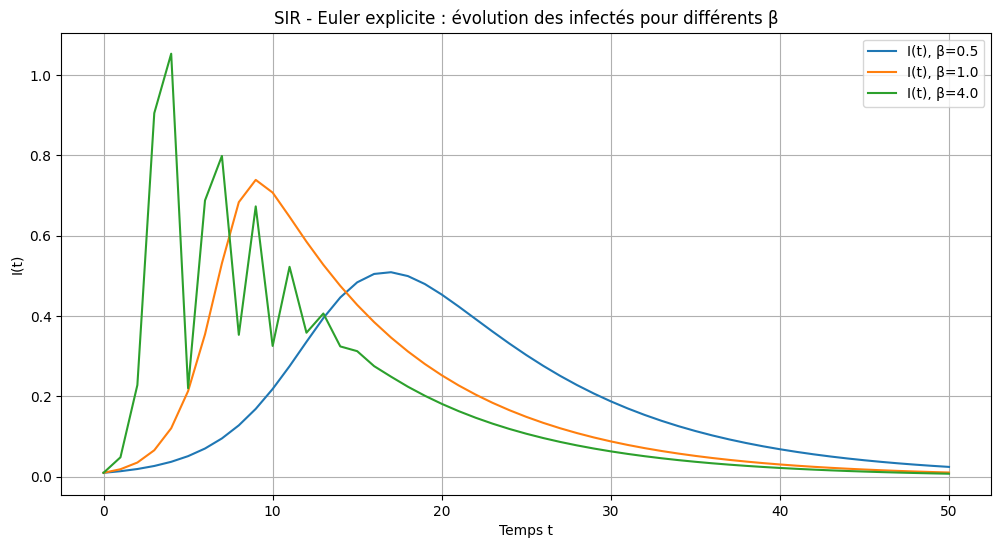

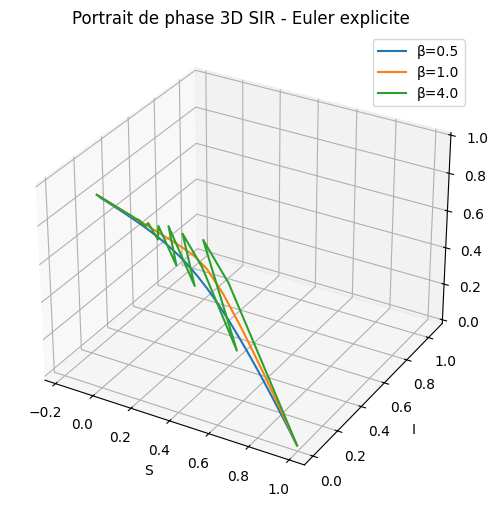

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Modèle SIR ---
def sir_model(X, beta, gamma):
    S, I, R = X
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

# --- Euler explicite ---
def euler_explicite_sir(X0, dt, T, beta, gamma):
    n_steps = int(T/dt)
    X = np.zeros((n_steps+1, 3))
    X[0] = X0
    for n in range(n_steps):
        X[n+1] = X[n] + dt * sir_model(X[n], beta, gamma)
    t = np.linspace(0, T, n_steps+1)
    return t, X

# --- Paramètres initiaux ---
S0 = 0.99
I0 = 0.01
R0 = 0.0
X0 = [S0, I0, R0]

T = 50
dt = 1.0
# Paramètres à tester : différents beta (R0 = beta/gamma * S0)
gammas = [0.1]  # taux de récupération fixe
betas = [0.5,1.0,4.0]  # différents taux d'infection

# --- Graphiques S(t), I(t), R(t) ---
plt.figure(figsize=(12,6))
for beta in betas:
    gamma = gammas[0]
    t, X = euler_explicite_sir(X0, dt, T, beta, gamma)
    S, I, R = X[:,0], X[:,1], X[:,2]
    plt.plot(t, I, label=f"I(t), β={beta}")
plt.xlabel("Temps t")
plt.ylabel("I(t)")
plt.title("SIR - Euler explicite : évolution des infectés pour différents β")
plt.grid(True)
plt.legend()
plt.show()

# --- Portrait de phase 3D (S, I, R) ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for beta in betas:
    gamma = gammas[0]
    t, X = euler_explicite_sir(X0, dt, T, beta, gamma)
    S, I, R = X[:,0], X[:,1], X[:,2]
    ax.plot(S, I, R, label=f"β={beta}")
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("Portrait de phase 3D SIR - Euler explicite")
ax.legend()
plt.show()


# RK4

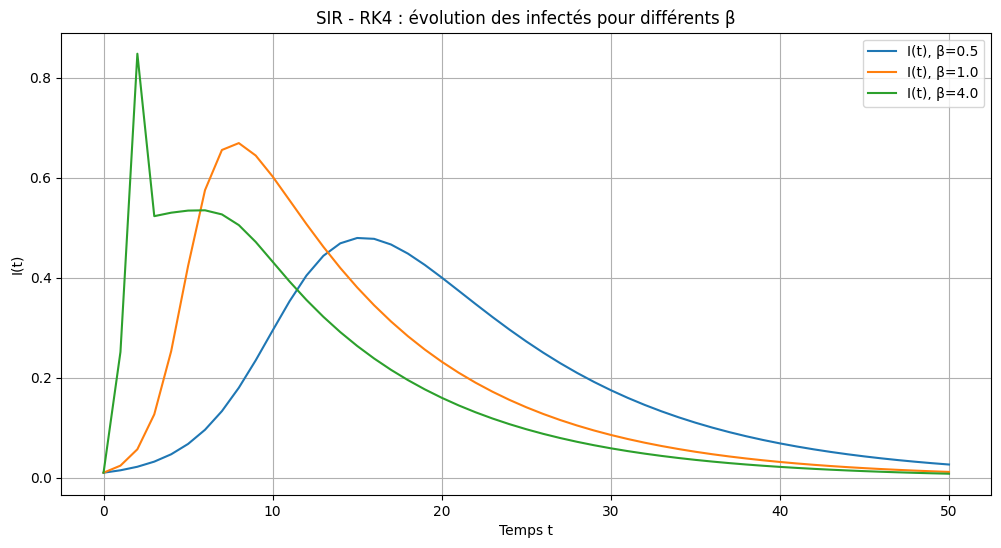

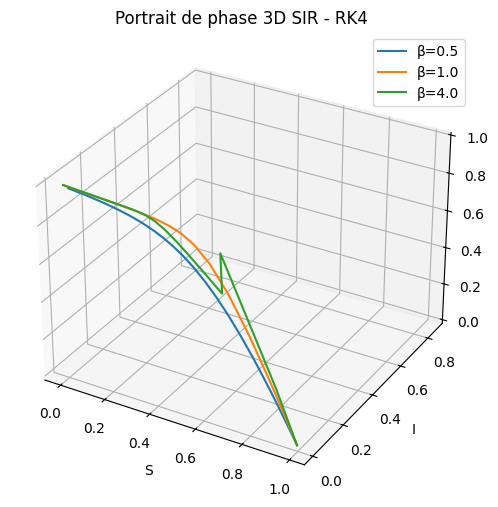

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Modèle SIR ---
def sir_model(X, beta, gamma):
    S, I, R = X
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

# --- Schéma RK4 ---
def rk4_sir(X0, dt, T, beta, gamma):
    n_steps = int(T/dt)
    X = np.zeros((n_steps+1, 3))
    X[0] = X0
    t = np.linspace(0, T, n_steps+1)
    for n in range(n_steps):
        k1 = sir_model(X[n], beta, gamma)
        k2 = sir_model(X[n] + 0.5*dt*k1, beta, gamma)
        k3 = sir_model(X[n] + 0.5*dt*k2, beta, gamma)
        k4 = sir_model(X[n] + dt*k3, beta, gamma)
        X[n+1] = X[n] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, X

# --- Paramètres initiaux ---
S0 = 0.99
I0 = 0.01
R0 = 0.0
X0 = [S0, I0, R0]

T = 50
dt = 1.0

# Paramètres à tester : différents beta (R0 = beta/gamma * S0)
gammas = [0.1] 
betas = [0.5,1.0,4.0]  

# --- Graphiques I(t) vs t ---
plt.figure(figsize=(12,6))
for beta in betas:
    gamma = gammas[0]
    t, X = rk4_sir(X0, dt, T, beta, gamma)
    S, I, R = X[:,0], X[:,1], X[:,2]
    plt.plot(t, I, label=f"I(t), β={beta}")
plt.xlabel("Temps t")
plt.ylabel("I(t)")
plt.title("SIR - RK4 : évolution des infectés pour différents β")
plt.grid(True)
plt.legend()
plt.show()

# --- Portrait de phase 3D (S, I, R) ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for beta in betas:
    gamma = gammas[0]
    t, X = rk4_sir(X0, dt, T, beta, gamma)
    S, I, R = X[:,0], X[:,1], X[:,2]
    ax.plot(S, I, R, label=f"β={beta}")
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("Portrait de phase 3D SIR - RK4")
ax.legend()
plt.show()


# Euler implicite

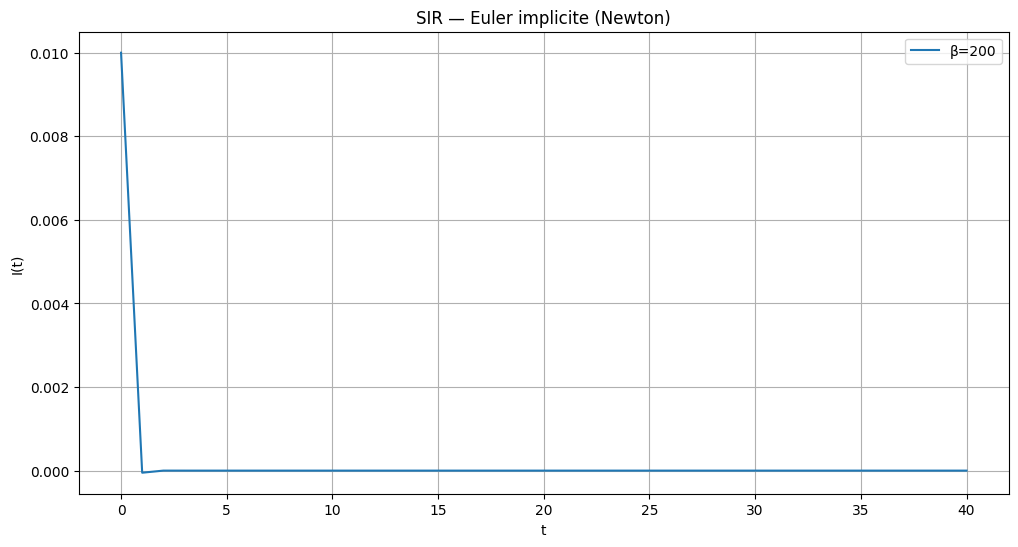

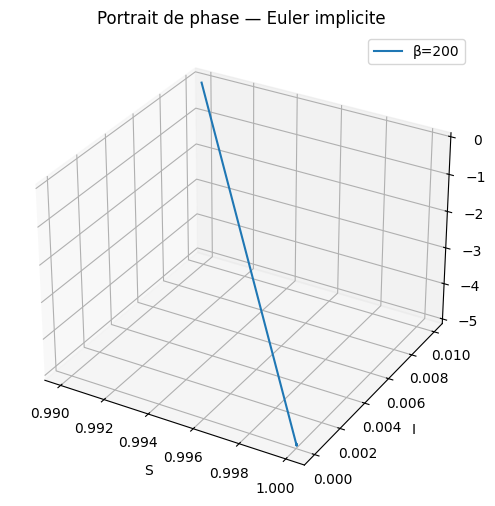

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# =========================
# Modèle SIR
# =========================
def sir_f(X, beta, gamma):
    S, I, R = X
    return np.array([
        -beta*S*I,
        beta*S*I - gamma*I,
        gamma*I
    ])

# Jacobien du modèle
def jacobian_sir(X, beta, gamma):
    S, I, R = X
    
    return np.array([
        [-beta*I,      -beta*S,      0],
        [ beta*I,  beta*S-gamma,     0],
        [ 0,           gamma,        0]
    ])


# =========================
# Euler implicite (Newton)
# =========================
def euler_imp_newton(X0, dt, T, beta, gamma):
    
    n = int(T/dt)
    X = np.zeros((n+1,3))
    X[0] = X0
    
    I3 = np.eye(3)
    
    for k in range(n):
        
        X_next = X[k].copy()  # guess initial
        
        for _ in range(8):  # iterations Newton
            
            G = X_next - X[k] - dt * sir_f(X_next, beta, gamma)
            J = I3 - dt * jacobian_sir(X_next, beta, gamma)
            
            delta = np.linalg.solve(J, G)
            X_next = X_next - delta
        
        X[k+1] = X_next
    
    return X


# =========================
# TEST
# =========================

X0 = [0.99, 0.01, 0]
beta_vals = [200]
gamma = 0.1
dt = 1
T = 40


# ----- Graph temporel
plt.figure(figsize=(12,6))

for beta in beta_vals:
    X = euler_imp_newton(X0, dt, T, beta, gamma)
    t = np.linspace(0,T,len(X))
    plt.plot(t, X[:,1], label=f"β={beta}")

plt.legend()
plt.grid()
plt.title("SIR — Euler implicite (Newton)")
plt.xlabel("t")
plt.ylabel("I(t)")
plt.show()


# ----- Portrait phase 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for beta in beta_vals:
    X = euler_imp_newton(X0, dt, T, beta, gamma)
    ax.plot(X[:,0], X[:,1], X[:,2], label=f"β={beta}")

ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.legend()
plt.title("Portrait de phase — Euler implicite")
plt.show()


0 0.15165987610816956
200 7.108616409823298e-05
400 1.9719322153832763e-05
600 1.0958234270219691e-05
800 6.1769078456563875e-06
1000 3.1324298106483184e-06
1200 1.5099021766218357e-06
1400 9.492502499597322e-07
1600 9.67163146015082e-07
1800 1.9089325178356376e-06


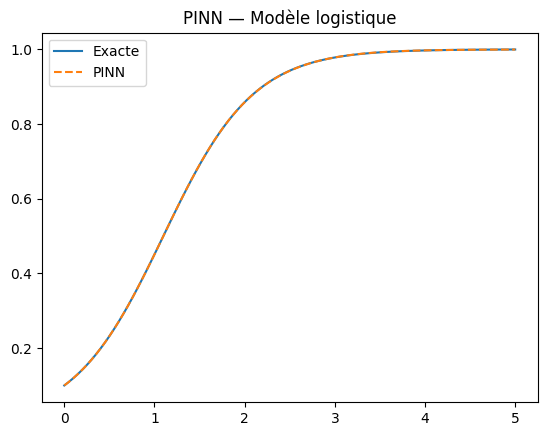

In [289]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Paramètres logistique
# =========================
r = 2.0
x0 = 0.1
T = 5

# points temps
t = torch.linspace(0, T, 100).reshape(-1,1)
t.requires_grad_(True)

# =========================
# Réseau PINN
# =========================
class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1,32),
            nn.Tanh(),
            nn.Linear(32,32),
            nn.Tanh(),
            nn.Linear(32,1)
        )
        
    def forward(self,t):
        return self.net(t)

model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# =========================
# Entrainement
# =========================
for epoch in range(2000):

    x = model(t)

    # dérivée automatique
    dx_dt = torch.autograd.grad(
        x, t,
        grad_outputs=torch.ones_like(x),
        create_graph=True
    )[0]

    # résidu physique
    residual = dx_dt - r*x*(1-x)

    loss_phys = torch.mean(residual**2)
    loss_ic = (model(torch.tensor([[0.0]])) - x0)**2

    loss = loss_phys + loss_ic

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(epoch, loss.item())


# =========================
# Comparaison solution exacte
# =========================
with torch.no_grad():
    pred = model(t).numpy()

t_np = t.detach().numpy()

# solution analytique
exact = x0*np.exp(r*t_np)/(1 + x0*(np.exp(r*t_np)-1))

plt.plot(t_np, exact, label="Exacte")
plt.plot(t_np, pred, '--', label="PINN")
plt.legend()
plt.title("PINN — Modèle logistique")
plt.show()
